# FIFA19 Players Data Analysis

FIFA19 is the official football game of EA Sports. Queries in the following project are based on the Player Dataset of FIFA19. This Dataset is available in Kaggle which is a hub of datasets. This dataset consists of details of players and their stats in the year 2019. This can be used to determine success ratio, ratings, top players etc.

In this project I have used Numpy, Pandas, Matplotlib and Seaborn. This project is part of the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com). It is a mandatory project to mark the success of the course (untill evaulated to PASS).

## Table of Contents
- [How to run the code](#How-to-run-the-code)
- [Downloading the Dataset](#1.-Downloading-the-Dataset)
- [Data Preparation and Cleaning](#2.-Data-Preparation-and-Cleaning)
 - [Determining the number of attributes in the dataset](#2.1-Determining-the-number-of-attributes-in-the-dataset)
 - [Cleaning the dataset](#2.2-Cleaning-the-dataset)
- [Exploratory Analysis and Visualization](#3.-Exploratory-Analysis-and-Visualization)
 - [Heatmap representing relation between the properties of attributes of football players](#3.1-Heatmap-representing-relation-between-the-properties-of-attributes-of-football-players)
 - [Nation wise list of players contributing to football](#3.2-Nation-wise-list-of-players-contributing-to-football)
 - [Comparison of positions to number of players](#3.3-Comparison-of-positions-to-number-of-players)
 - [Preferred foot of players](#3.4-Preferred-foot-of-players)
 - [Player's Overall (Rating) Distribution](#3.5-Player's-Overall-(Rating)-Distribution)
- [Asking and Answering Questions](#Asking-and-answering-Questions)
 - [What are the different nations that are a part of FIFA?](#Q1:-What-are-the-different-nations-that-are-a-part-of-FIFA?)
 - [What is the highest number of players for a single position?](#Q2:-What-is-the-highest-number-of-players-for-a-single-position?)
 - [What is the dominant foot of players?](#Q3:-What-is-the-dominant-foot-of-players?)
 - [What is the age distribution in FIFA19?](#Q4:-What-is-the-age-distribution-in-FIFA19?)
 - [Which club has the highest Overall Rating?](#Q5:-Which-club-has-the-highest-Overall-Rating?)
- [Inferences and Conclusion](#5.-Inferences-and-Conclusion)

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## 1. Downloading the Dataset

Datasets can be downloaded withing Jupyter using the opendatasets Python Library.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/karangadiya/fifa19'

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gauravbisht005
Your Kaggle Key: ········


100%|██████████| 2.18M/2.18M [00:00<00:00, 103MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './fifa19'

In [5]:
import os
os.listdir(data_dir)

['data.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "FIFA19-Player-Data-Analysis"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "gauravbisht005/fifa19-player-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/gauravbisht005/fifa19-player-data-analysis


'https://jovian.ml/gauravbisht005/fifa19-player-data-analysis'

## 2. Data Preparation and Cleaning

Data Cleaning is the process of finding and correcting inaccurate or incomplete records in dataset by replacing/ modifying/ removing those records so that the dataset is prepared to be operated.

In [10]:
import pandas as pd

In [11]:
fifa19_df = pd.read_csv(data_dir + "/data.csv")

In [12]:
fifa19_df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


### 2.1 Determining the number of attributes in the dataset

In [13]:
fifa19_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

### 2.2 Cleaning the dataset

In [14]:
missing_data = pd.isna(fifa19_df.columns).sum()
missing_data

0

Fortunately, there was no missing data in the dataset!!

In [15]:
fifa19_df.drop("Unnamed: 0",axis=1, inplace= True)
fifa19_df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


There was no missing data in the dataset but an unnecessary attribute which has been removed above.

In [16]:
import jovian

In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "gauravbisht005/fifa19-player-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/gauravbisht005/fifa19-player-data-analysis


'https://jovian.ml/gauravbisht005/fifa19-player-data-analysis'

## 3. Exploratory Analysis and Visualization

In the following segment, I have analysed datasets to summarise general main characterstics using visual methods with the help of Python Libraries such as Matplotlib.pyplot and Seaborn.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### 3.1 Heatmap representing relation between the properties of attributes of football players

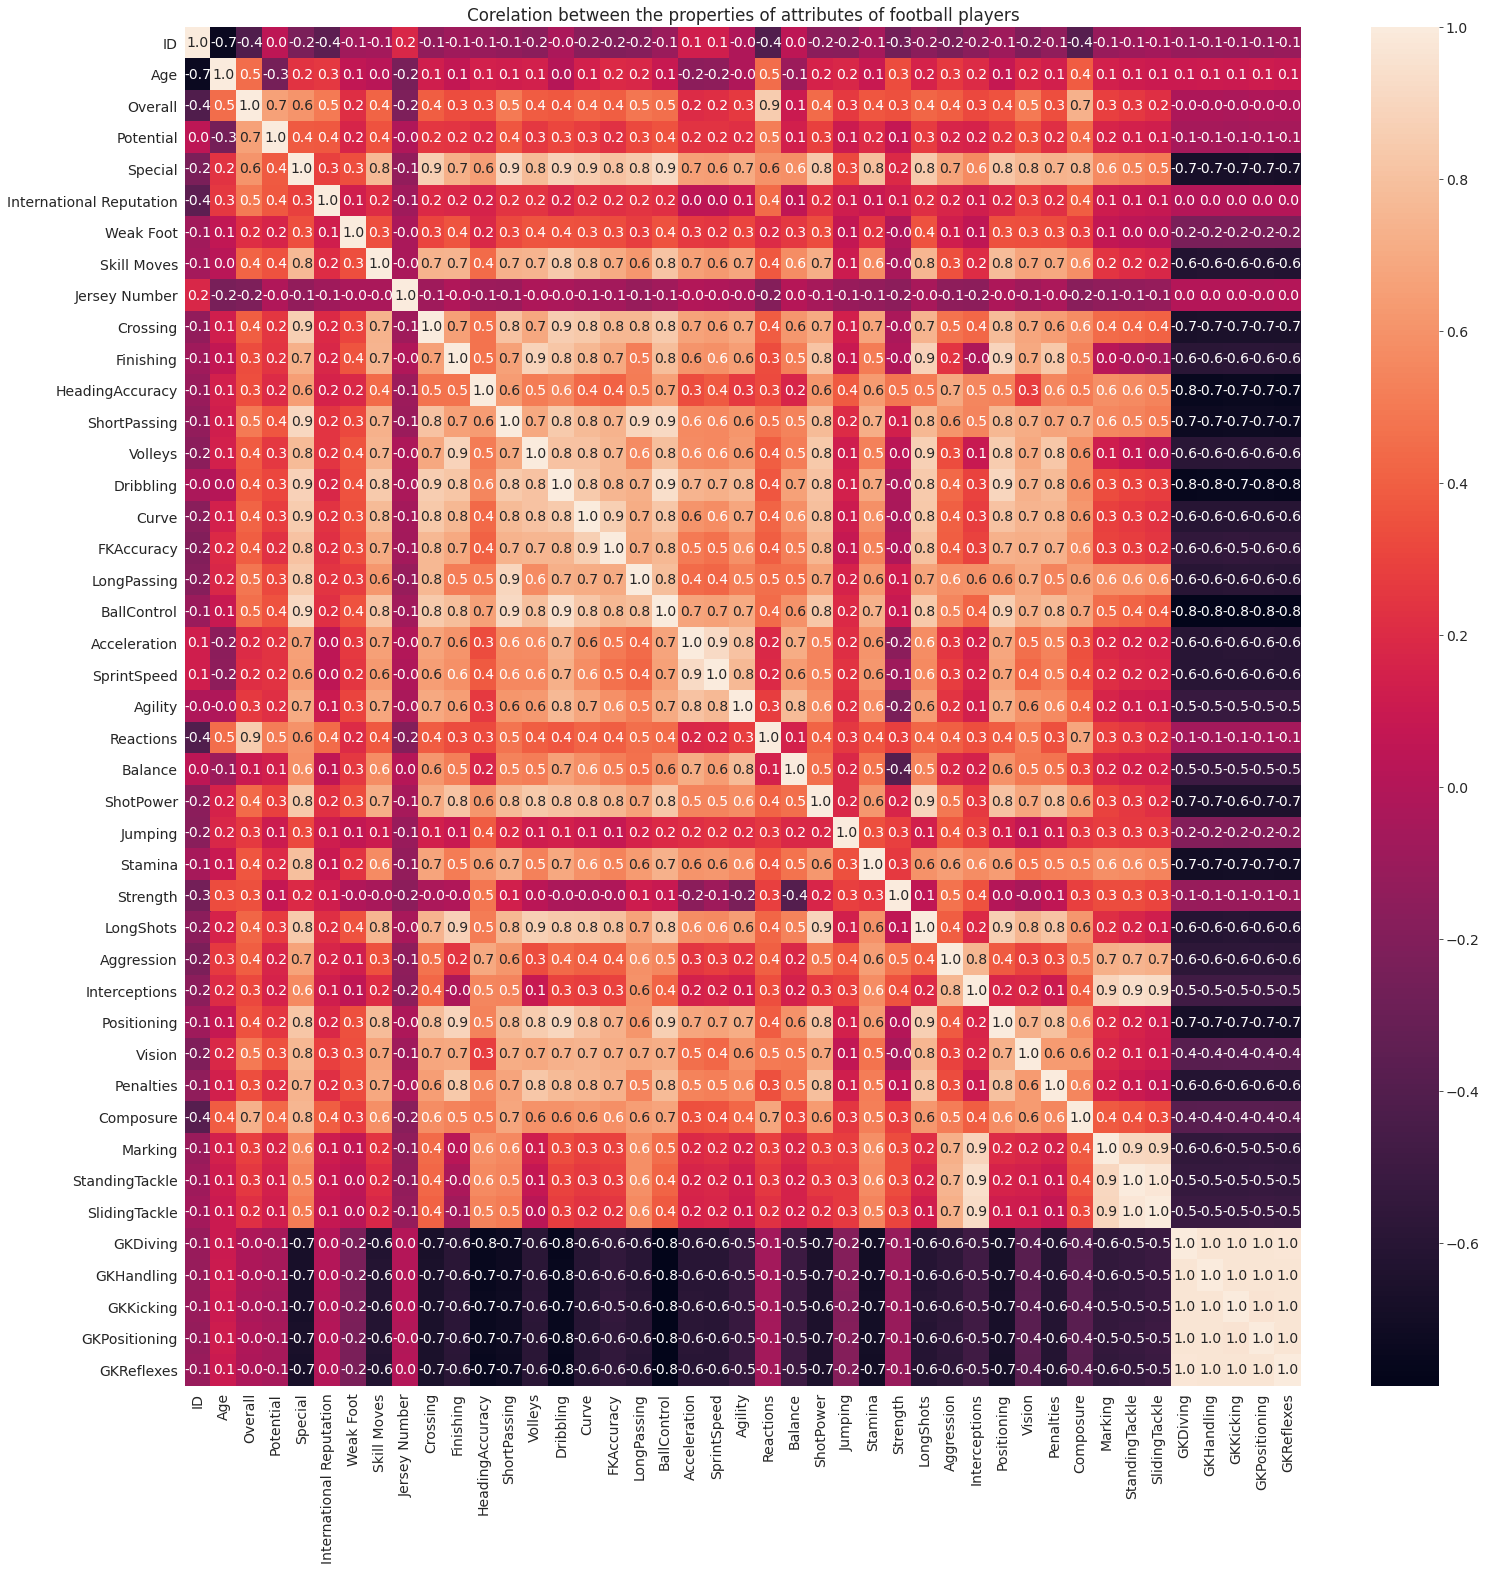

In [19]:
plt.figure(figsize = (25, 25))
sns.heatmap(fifa19_df.corr(), annot = True, fmt = '.1f')
plt.title("Corelation between the properties of attributes of football players")
plt.show()

The above representation is a heat map which represents the relation among the properties of the attributes of football players. From this we can understand that the goalkeepers in the FIFA19 are all closely rated as the GK skills in the heatmap show strong relations as compared to player skills signifying a high variation in the ratings if non-goal keeper players

### 3.2 Nation wise list of players contributing to football

In [20]:
counts_Nationality = fifa19_df["Nationality"].value_counts()
counts_Nationality = counts_Nationality.reset_index()
counts_Nationality.columns= ["Nations","Counts"]
counts_Nationality

,Nations,Counts
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914
...,...,...
159,St Lucia,1
160,Kuwait,1
161,Jordan,1
162,Palestine,1


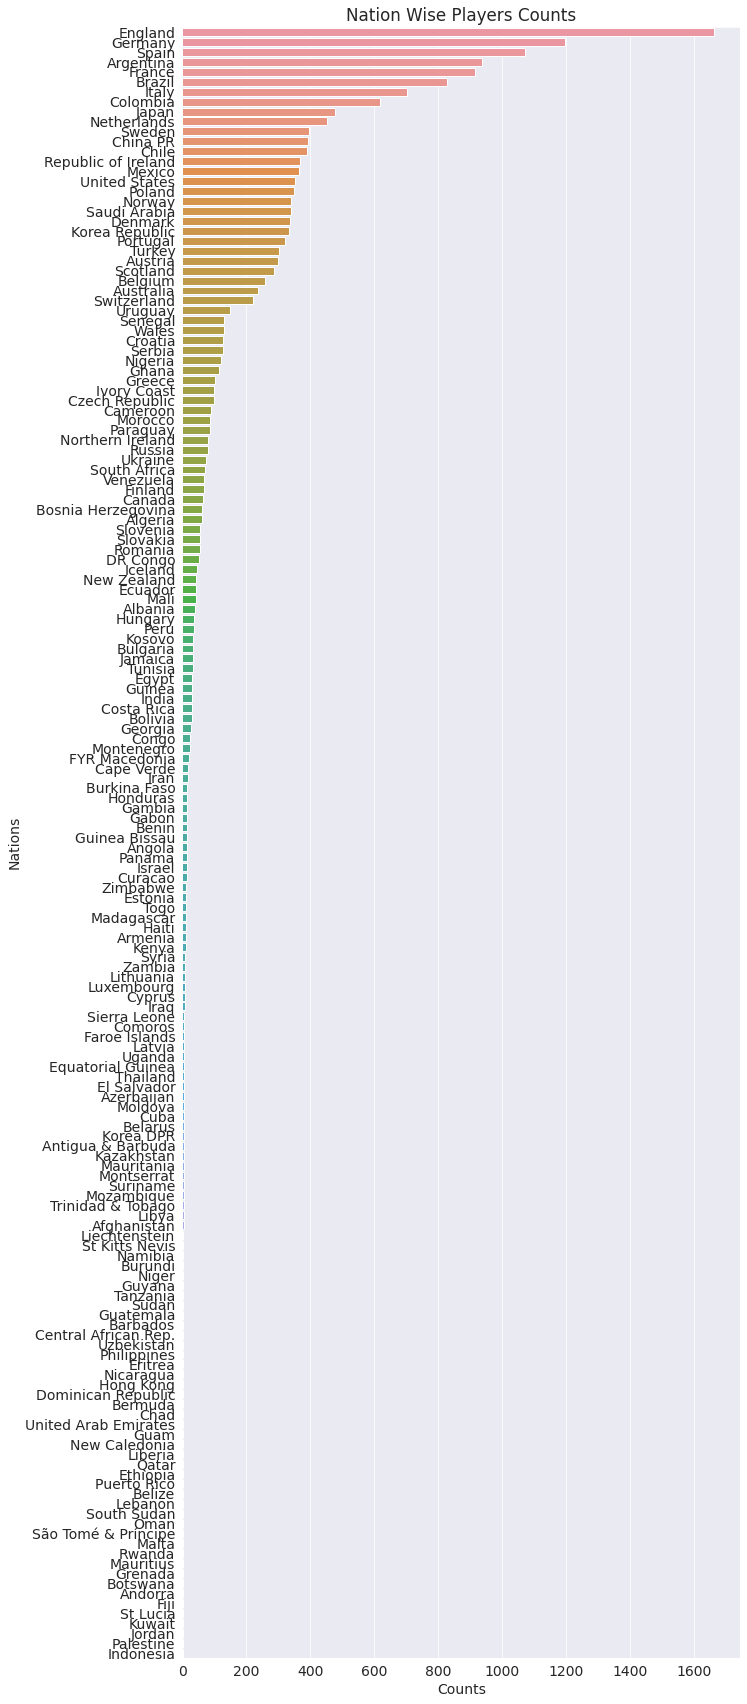

In [21]:
plt.figure(figsize = (10, 30))
sns.barplot(x = "Counts", y = "Nations", data = counts_Nationality)
plt.title("Nation Wise Players Counts");
plt.show()

The above graph represents that the maximum number of players in FIFA19 are from England.

### 3.3 Comparison of positions to number of players

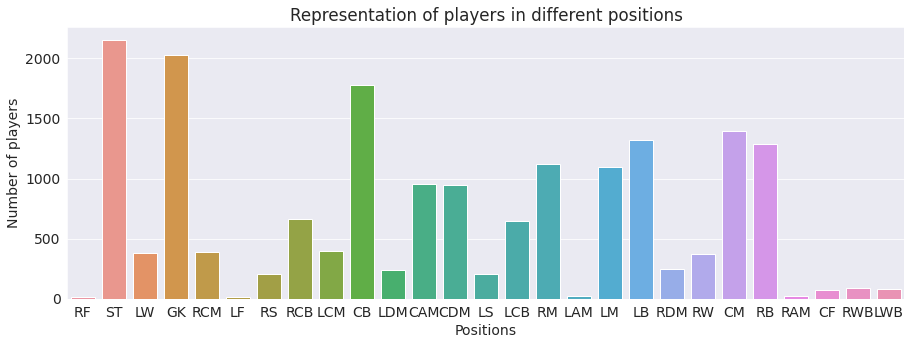

In [22]:
plt.figure(figsize=(15,5))
sns.countplot('Position', data=fifa19_df)
plt.xlabel("Positions")
plt.ylabel("Number of players")
plt.title("Representation of players in different positions")
plt.show()

The above bar graph represents the number of players to the number of possible positions.

### 3.4 Preferred foot of players

In [23]:
preferred_foot = fifa19_df['Preferred Foot'].value_counts().reset_index()
preferred_foot.columns = ['Foot', "Total Players"]
preferred_foot = preferred_foot.set_index('Foot')
preferred_foot

,Total Players
Foot,
Right,13948
Left,4211


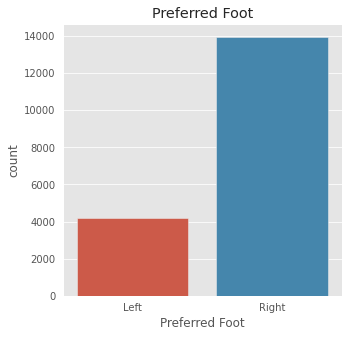

In [24]:
plt.figure(figsize = (5,5))
plt.style.use('ggplot')
sns.countplot(x=fifa19_df['Preferred Foot'])
plt.title("Preferred Foot")
plt.show()

The above bargraph represents the number of players which prefer right foot to the number of players which prefer left foot.

### 3.5 Player's Overall (Rating) Distribution

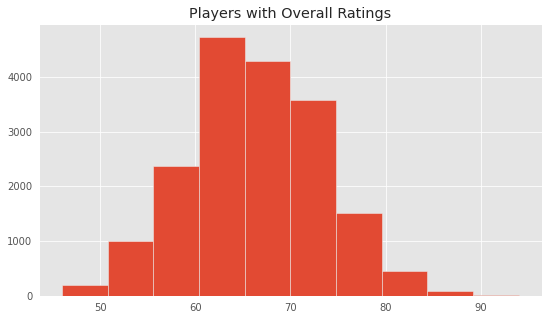

In [25]:
plt.title("Players with Overall Ratings")
plt.hist(fifa19_df.Overall);

The above shown graph is a histogram which depicts the number of players having an Overall Rating from 1- 100 in FIFA19.

Let us save and upload our work to Jovian before continuing

In [26]:
import jovian

In [27]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "gauravbisht005/fifa19-player-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/gauravbisht005/fifa19-player-data-analysis


'https://jovian.ml/gauravbisht005/fifa19-player-data-analysis'

## 4. Asking and Answering Questions

In this segment I have answered some questions inferred from the earlier given data and the information gathered from the dataset.

#### Q1: What are the different nations that are a part of FIFA?

In [28]:
Nations = fifa19_df.Nationality.unique()
Nations

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

#### Q2: What is the highest number of players for a single position?

In [29]:
position_count = fifa19_df.groupby('Position').count()
position_count = position_count['ID']
position_count

Position
CAM     958
CB     1778
CDM     948
CF       74
CM     1394
GK     2025
LAM      21
LB     1322
LCB     648
LCM     395
LDM     243
LF       15
LM     1095
LS      207
LW      381
LWB      78
RAM      21
RB     1291
RCB     662
RCM     391
RDM     248
RF       16
RM     1124
RS      203
RW      370
RWB      87
ST     2152
Name: ID, dtype: int64

Hence, from the information obtained above, we can come to conclusion that there are 2152 Strikers which is the position with most players in FIFA19.

#### Q3: What is the dominant foot of players?

In [30]:
fifa19_df['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

Hence, from the above information, we can state that the preferred foot of most of the players is Right Foot.

#### Q4: What is the age distribution in FIFA19?

In [31]:
max_age = fifa19_df.Age.max()
max_age

45

The above query shows that the highes aged player in FIFA19 is 45 years old.

In [32]:
min_age = fifa19_df.Age.min()
min_age

16

The above query shows that the youngest player in FIFA19 is just 16 years old.

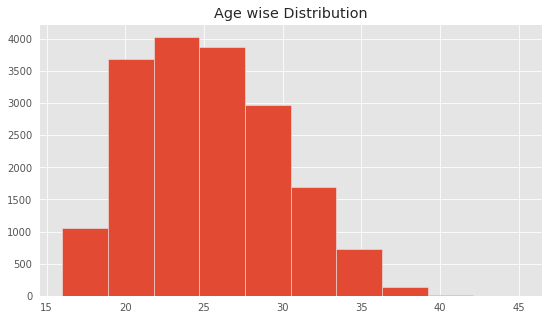

In [33]:
plt.title("Age wise Distribution")
plt.hist(fifa19_df.Age);

Hence, the maximum number of players are of the age group 23-25. The youngest being 16 years old and the eldest being 45 years old.

#### Q5: Which club has the highest Overall Rating?

In [34]:
highest_overall_club = fifa19_df.groupby('Club').Overall.mean().reset_index().sort_values(by='Overall', ascending=False)
highest_overall_club

,Club,Overall
326,Juventus,82.280000
398,Napoli,80.000000
315,Inter,79.750000
470,Real Madrid,78.242424
382,Milan,78.074074
...,...,...
543,Sligo Rovers,56.631579
188,Derry City,55.777778
83,Bohemian FC,55.000000
361,Limerick FC,54.526316


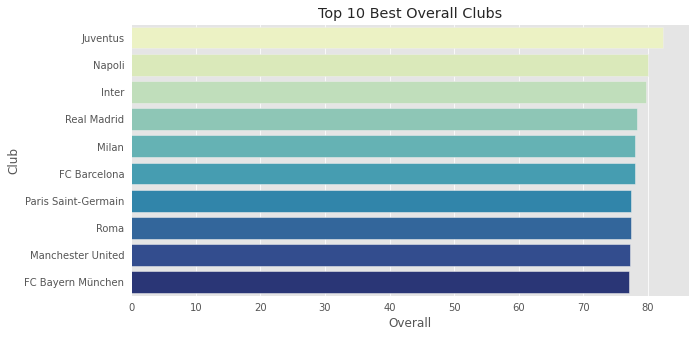

In [35]:
top10_clubs = highest_overall_club.head(10)
plt.figure(figsize = (10,5))
sns.barplot(x=top10_clubs.Overall, y=top10_clubs['Club'], palette='YlGnBu')
plt.title("Top 10 Best Overall Clubs");

Hence, from the above information, we can say that 'Juventus' as a club has the highest Overall rating in FIFA19.

In [36]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## 5. Inferences and Conclusion

From all the cleaning, preparation, analysis and visualisation we can successfully conclude few things such as:
- GK in FIFA 19 have a closer mean average rating in contrast to the non-goal keeper players.
- 164 countries are a part of this FIFA 19.
- England constitues the maximum number of players among any nation.
- The game has maximum number of players who are strikers followed with goal keepers and Centre Backs.
- More than 3/4th of the players are roght footed or prefer right foot.
- Youngest player in the game is 16 years old and the oldest player is 45 years old.
- Juventus is the highest overall rated club/ team in the game with an overall mean rating of 82.

In [ ]:
import jovian

In [ ]:
jovian.commit()